In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import re

In [2]:
PID = '1_EXP05_Full/'

In [57]:
# read from existing files
df_cr_w1 = pd.read_csv(PID + 'week_1/' + 'child-robot.csv')
df_cp_w1 = pd.read_csv(PID + 'week_1/' + 'child-parent.csv')
df_pr_w1 = pd.read_csv(PID + 'week_1/' + 'parent-robot.csv')

df_cr_w2 = pd.read_csv(PID + 'week_2/' + 'child-robot.csv')
df_cp_w2 = pd.read_csv(PID + 'week_2/' + 'child-parent.csv')
df_pr_w2 = pd.read_csv(PID + 'week_2/' + 'parent-robot.csv')

df_cr_w3 = pd.read_csv(PID + 'week_3/' + 'child-robot.csv')
df_cp_w3 = pd.read_csv(PID + 'week_3/' + 'child-parent.csv')
df_pr_w3 = pd.read_csv(PID + 'week_3/' + 'parent-robot.csv')

df_cr_w4 = pd.read_csv(PID + 'week_4/' + 'child-robot.csv')
df_cp_w4 = pd.read_csv(PID + 'week_4/' + 'child-parent.csv')
df_pr_w4 = pd.read_csv(PID + 'week_4/' + 'parent-robot.csv')

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style('white')

In [44]:
# remove outlier lags based on stable behavior throughout the week
df_cr_w1 = df_cr_w1[(np.abs(stats.zscore(df_cr_w1['lag'])) < 3)].reset_index()
df_cp_w1 = df_cp_w1[(np.abs(stats.zscore(df_cp_w1['lag'])) < 3)].reset_index()
df_pr_w1 = df_pr_w1[(np.abs(stats.zscore(df_pr_w1['lag'])) < 3)].reset_index()

df_cr_w2 = df_cr_w2[(np.abs(stats.zscore(df_cr_w2['lag'])) < 3)].reset_index()
df_cp_w2 = df_cp_w2[(np.abs(stats.zscore(df_cp_w2['lag'])) < 3)].reset_index()
df_pr_w2 = df_pr_w2[(np.abs(stats.zscore(df_pr_w2['lag'])) < 3)].reset_index()

df_cr_w3 = df_cr_w3[(np.abs(stats.zscore(df_cr_w3['lag'])) < 3)].reset_index()
df_cp_w3 = df_cp_w3[(np.abs(stats.zscore(df_cp_w3['lag'])) < 3)].reset_index()
df_pr_w3 = df_pr_w3[(np.abs(stats.zscore(df_pr_w3['lag'])) < 3)].reset_index()

df_cr_w4 = df_cr_w4[(np.abs(stats.zscore(df_cr_w4['lag'])) < 3)].reset_index()
df_cp_w4 = df_cp_w4[(np.abs(stats.zscore(df_cp_w4['lag'])) < 3)].reset_index()
df_pr_w4 = df_pr_w4[(np.abs(stats.zscore(df_pr_w4['lag'])) < 3)].reset_index()

In [45]:
def unix_to_datetime(ts):
    return datetime.utcfromtimestamp(ts)

def get_unique_days(df_column):
    realtime = df_column.apply(lambda x: unix_to_datetime(x))
    days = np.array(realtime.apply(lambda x: x.day))
    return days, np.unique(days)

In [46]:
days_w1, unique_days_w1 = get_unique_days(df_cr_w1['start'])
days_w2, unique_days_w2 = get_unique_days(df_cr_w2['start'])
days_w3, unique_days_w3 = get_unique_days(df_cr_w3['start'])
days_w4, unique_days_w4 = get_unique_days(df_cr_w4['start'])

In [47]:
df_cr_w1.insert(0, 'day', df_cr_w1['start'].apply(lambda x: unix_to_datetime(x).day))
df_cr_w2.insert(0, 'day', df_cr_w2['start'].apply(lambda x: unix_to_datetime(x).day))
df_cr_w3.insert(0, 'day', df_cr_w3['start'].apply(lambda x: unix_to_datetime(x).day))
df_cr_w4.insert(0, 'day', df_cr_w4['start'].apply(lambda x: unix_to_datetime(x).day))

In [48]:
df_cr_w1[df_cr_w1['day'] == unique_days_w1[3]]

,day,index,object,duration,start,initiator,lag
894,14,919,contact,3.699973,1.500051e+09,robot,0.641798
895,14,920,contact,9.399909,1.500051e+09,robot,4.441726
896,14,921,screen,0.400106,1.500051e+09,robot,0.542044
897,14,922,screen,0.399849,1.500051e+09,robot,5.542161
898,14,923,screen,0.200105,1.500051e+09,robot,0.141984
...,...,...,...,...,...,...,...
1081,14,1106,screen,0.100012,1.500052e+09,robot,9.743358
1082,14,1107,screen,0.700130,1.500052e+09,robot,12.343449
1083,14,1108,screen,1.900110,1.500052e+09,robot,13.143455
1084,14,1109,screen,0.200094,1.500052e+09,robot,15.143565


In [32]:
df_cr_w1[df_cr_w1['day'] == unique_days_w1[3]].to_csv('test.csv')

In [53]:
def separate_by_day(df_week, unique_days):
    dfs_days = []
    for day in unique_days:
        df_day = df_week[df_week['day']==day]
        epoch_start = df_day['start'].min()
        df_day.insert(0, 'epoch', df_day['start'].apply(lambda x: x - epoch_start))
        df_day.insert(0, 'timestamp', df_day['start'].apply(lambda x: str(int((x - epoch_start)/60)) + ':' + str(int((x - epoch_start)%60))))
        df_day = df_day[(np.abs(stats.zscore(df_day['epoch'])) < 3)]
        df_day = df_day[(np.abs(stats.zscore(df_day['lag'])) < 3)]
        dfs_days.append(df_day)
    return dfs_days

In [54]:
dfs_cr_w1 = separate_by_day(df_cr_w1, unique_days_w1)
dfs_cr_w2 = separate_by_day(df_cr_w2, unique_days_w2)
dfs_cr_w3 = separate_by_day(df_cr_w3, unique_days_w3)
dfs_cr_w4 = separate_by_day(df_cr_w4, unique_days_w4)

In [56]:
dfs_cr_w1[3].to_csv('test.csv')

In [13]:
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

score=0.052, coef=0.022, intercept=21.225


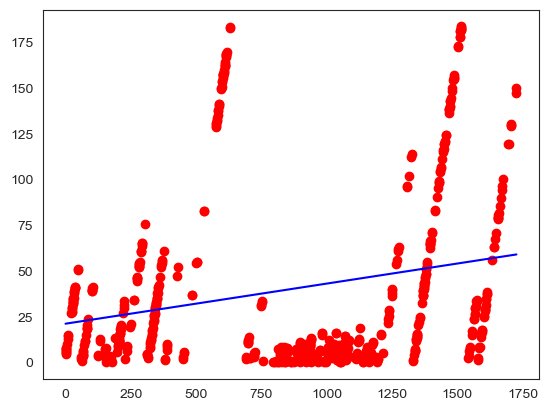

In [22]:
# example plot for a given day

X = np.array(dfs_cr_w1[1][dfs_cr_w1[1]['initiator'] == 'robot']['epoch']).reshape(-1, 1)
y = np.array(dfs_cr_w1[1][dfs_cr_w1[1]['initiator'] == 'robot']['lag'])

reg = LinearRegression().fit(X, y)
print('score=%.3f, coef=%.3f, intercept=%.3f' % (reg.score(X, y), reg.coef_, reg.intercept_))

plt.scatter(X, y, color='red')
plt.plot(X, reg.predict(X), color='blue')
plt.show()

In [23]:
def linear_regression_by_day(df_days):
    d = 0
    for df_day in df_days:
        X = np.array(df_day[df_day['initiator'] == 'robot']['epoch']).reshape(-1, 1)
        y = np.array(df_day[df_day['initiator'] == 'robot']['lag'])

        reg = LinearRegression().fit(X, y)
        linear = reg.coef_ > 0.6
        print('day=%d, score=%.5f, coef=%.5f, intercept=%.3f, linear?=%s' % (d, reg.score(X, y), reg.coef_, reg.intercept_, linear[0]))
        d = d + 1

def ttest_between(p1, p2):
    y1 = np.array(p1[p1['initiator'] == 'robot']['lag'])
    y2 = np.array(p2[p2['initiator'] == 'robot']['lag'])

    stat, p = ttest_ind(y2, y1)
    significance = '*' if p <= 0.05 else ''
    print('\tt=%.3f, p=%.10f%s' % (stat, p, significance))

print('\nWEEK 1:')
linear_regression_by_day(dfs_cr_w1)
ttest_between(dfs_cr_w1[0], dfs_cr_w1[-1])

print('\nWEEK 2:')
linear_regression_by_day(dfs_cr_w2)
ttest_between(dfs_cr_w2[0], dfs_cr_w2[-1])

print('\nWEEK 3:')
linear_regression_by_day(dfs_cr_w3)
ttest_between(dfs_cr_w3[0], dfs_cr_w3[-1])

print('\nWEEK 4:')
linear_regression_by_day(dfs_cr_w4)
ttest_between(dfs_cr_w4[0], dfs_cr_w4[-1])


WEEK 1:
day=0, score=1.00000, coef=1.00000, intercept=-210.402, linear?=True
day=1, score=0.05173, coef=0.02193, intercept=21.225, linear?=False
day=2, score=0.97185, coef=0.90161, intercept=-120.677, linear?=True
day=3, score=0.67428, coef=0.78599, intercept=-51.058, linear?=True
	t=4.657, p=0.0000057665*

WEEK 2:
day=0, score=0.10624, coef=-0.02208, intercept=12.671, linear?=False
day=1, score=0.05258, coef=0.01856, intercept=14.622, linear?=False
day=2, score=0.13819, coef=-0.00048, intercept=46.453, linear?=False
day=3, score=0.47000, coef=0.10330, intercept=-20.635, linear?=False
	t=7.996, p=0.0000000000*

WEEK 3:
day=0, score=0.00802, coef=-0.01579, intercept=34.278, linear?=False
day=1, score=0.07730, coef=-0.00142, intercept=127.251, linear?=False
day=2, score=0.18320, coef=0.06893, intercept=3.217, linear?=False
day=3, score=0.25649, coef=0.18286, intercept=11.885, linear?=False
day=4, score=0.04114, coef=0.01882, intercept=16.645, linear?=False
day=5, score=0.05893, coef=0.0

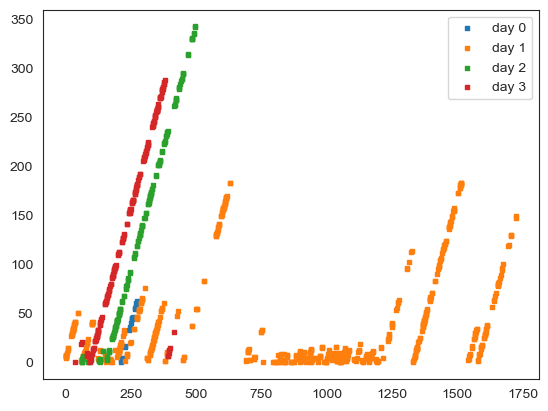

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

counter = 0
for df_day in dfs_cr_w1:
    X = np.array(df_day[df_day['initiator'] == 'robot']['epoch']).reshape(-1, 1)
    y = np.array(df_day[df_day['initiator'] == 'robot']['lag'])
    ax1.scatter(X, y, s=10, marker="s", label='day ' + str(counter))
    counter = counter + 1
    
plt.legend(loc='upper right');
plt.show()